## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [9]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [10]:
df = pd.read_csv("QueryResults.csv",header=0,names=["DATE","TAG","POST"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [11]:
print(df.head(5))
print(df.tail(5))

                  DATE       TAG  POST
0  2008-07-01 00:00:00        c#     3
1  2008-08-01 00:00:00  assembly     8
2  2008-08-01 00:00:00         c    83
3  2008-08-01 00:00:00        c#   505
4  2008-08-01 00:00:00       c++   164
                     DATE     TAG  POST
2533  2023-10-01 00:00:00     php  1666
2534  2023-10-01 00:00:00  python  9620
2535  2023-10-01 00:00:00       r  2107
2536  2023-10-01 00:00:00    ruby   210
2537  2023-10-01 00:00:00   swift   950


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [12]:
print(df.shape)

(2538, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [13]:
df["POST"].count()

2538

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [14]:
print(df.groupby(["TAG"]).sum())

                                                         DATE     POST
TAG                                                                   
assembly    2008-08-01 00:00:002008-09-01 00:00:002008-10-...    43484
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   400287
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1604392
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   800473
delphi      2008-08-01 00:00:002008-09-01 00:00:002008-10-...    51422
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    71233
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1907927
javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2513444
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    67910
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1461026
python      2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2166558
r           2008-09-01 00:00:002008-11-01 00:00:002008-12-...   498704
ruby  

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [15]:
print(df.groupby(["TAG"]).count())

            DATE  POST
TAG                   
assembly     183   183
c            183   183
c#           184   184
c++          183   183
delphi       183   183
go           168   168
java         183   183
javascript   183   183
perl         183   183
php          183   183
python       183   183
r            181   181
ruby         183   183
swift        175   175


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [16]:
df.DATE = pd.to_datetime(df.DATE)

In [17]:
df

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164
...,...,...,...
2533,2023-10-01,php,1666
2534,2023-10-01,python,9620
2535,2023-10-01,r,2107
2536,2023-10-01,ruby,210


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [18]:
df.shape

(2538, 3)

In [19]:
df.head(5)

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


In [20]:
df.columns

Index(['DATE', 'TAG', 'POST'], dtype='object')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [21]:
#pivot

In [22]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POST')

In [23]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,954.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,155.0,890.0,3801.0,1814.0,117.0,520.0,4283.0,7512.0,54.0,1898.0,11263.0,2662.0,226.0,1132.0
2023-07-01,161.0,917.0,3874.0,1852.0,99.0,523.0,4066.0,7532.0,69.0,1739.0,11140.0,2362.0,224.0,1153.0
2023-08-01,144.0,867.0,3654.0,1668.0,106.0,494.0,3841.0,6800.0,48.0,1783.0,10268.0,2359.0,201.0,979.0


In [24]:
reshaped_df.shape

(184, 14)

In [25]:
reshaped_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,954.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [26]:
reshaped_df.fillna(0,inplace=True)

In [27]:
reshaped_df.isna().values.any()

False

In [28]:
reshaped_df.count()

TAG
assembly      184
c             184
c#            184
c++           184
delphi        184
go            184
java          184
javascript    184
perl          184
php           184
python        184
r             184
ruby          184
swift         184
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [29]:
import matplotlib.pyplot as plt

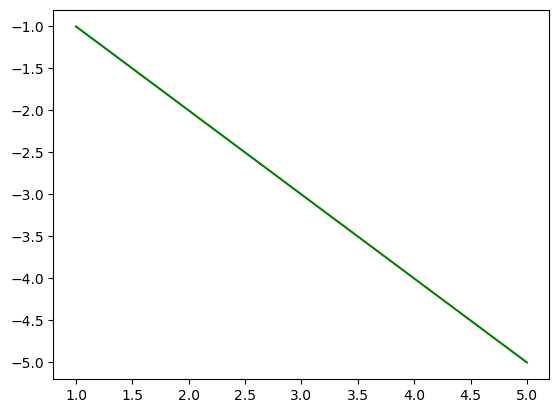

In [30]:
a = [1,2,3,4,5]
b = [-1,-2,-3,-4,-5]
fig,ax = plt.subplots()
ax.plot(a,b,'green')

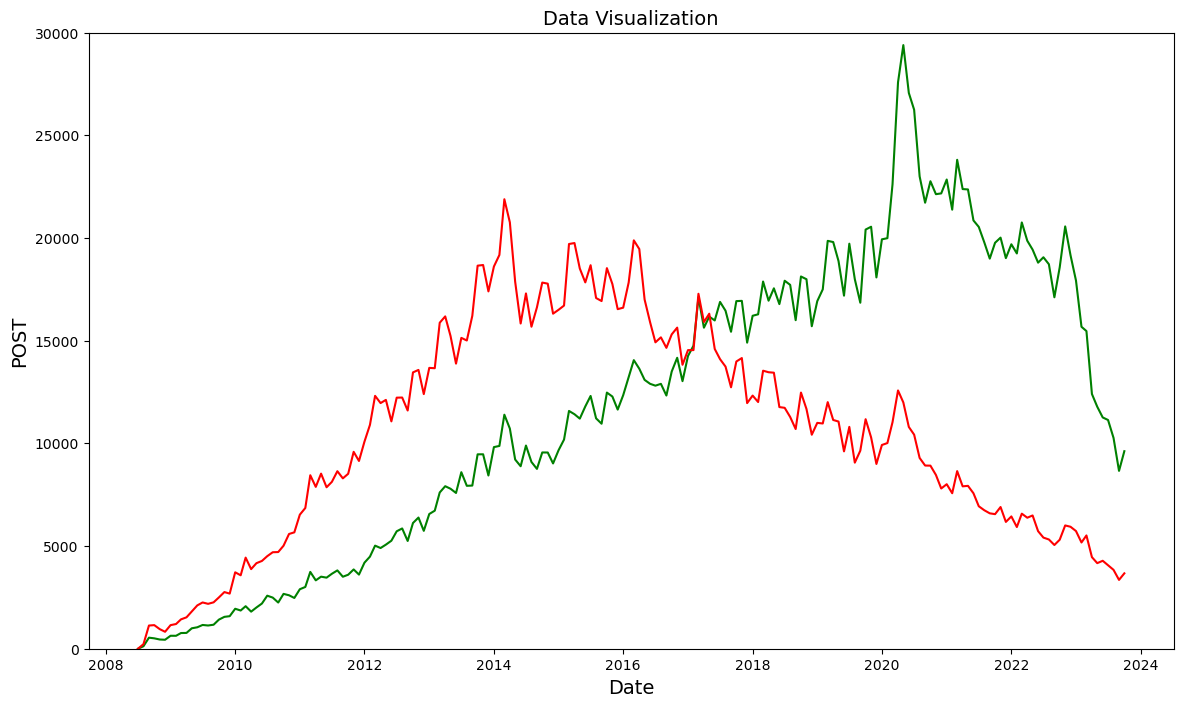

In [208]:
# fig,ax = plt.subplots()

# two line in using same plot
plt.figure(figsize=(14,8))
plt.title("Data Visualization",fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("POST",fontsize=14)
plt.ylim(0,30000)
plt.plot(reshaped_df.index,reshaped_df.python,'green',reshaped_df.java,'red')
plt.savefig("Famous tags python and java.pdf")
plt.show()

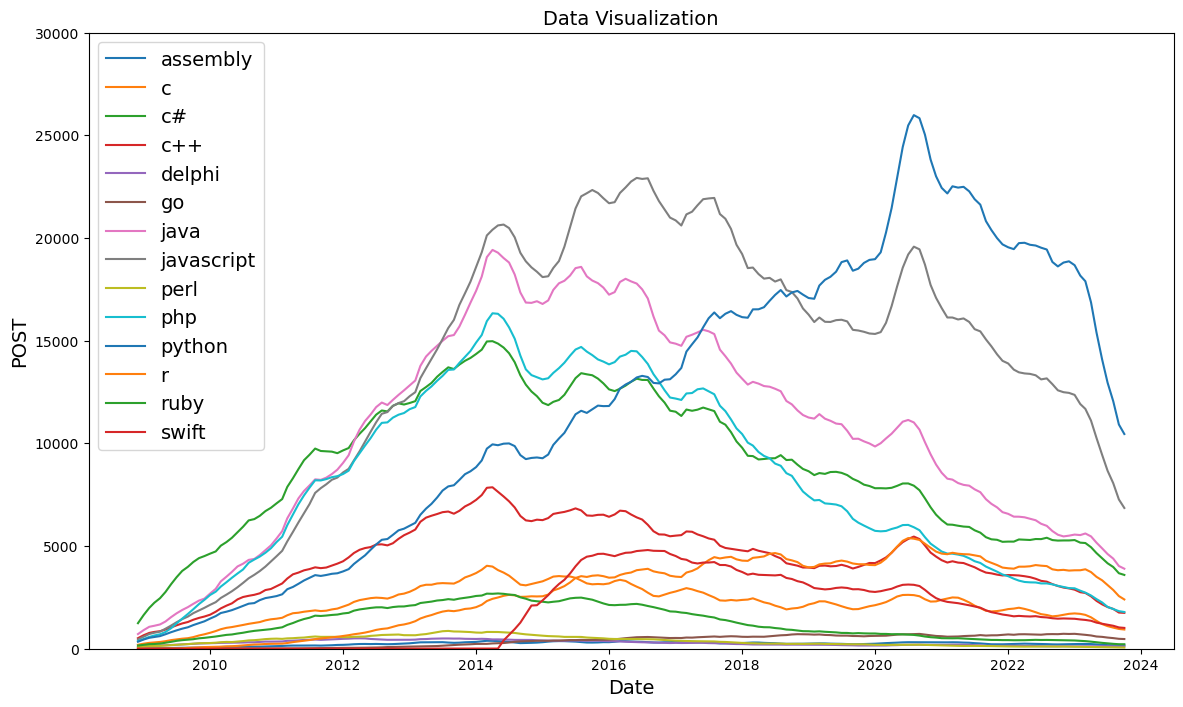

In [225]:
# two line in using two plot

roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(14,8))
plt.title("Data Visualization",fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("POST",fontsize=14)
plt.ylim(0,30000)

for i in reshaped_df.columns:
    plt.plot(roll_df.index,roll_df[i],label=reshaped_df[i].name)
    
plt.legend(fontsize=14) 
plt.savefig("Famous tags all.pdf")
plt.show()

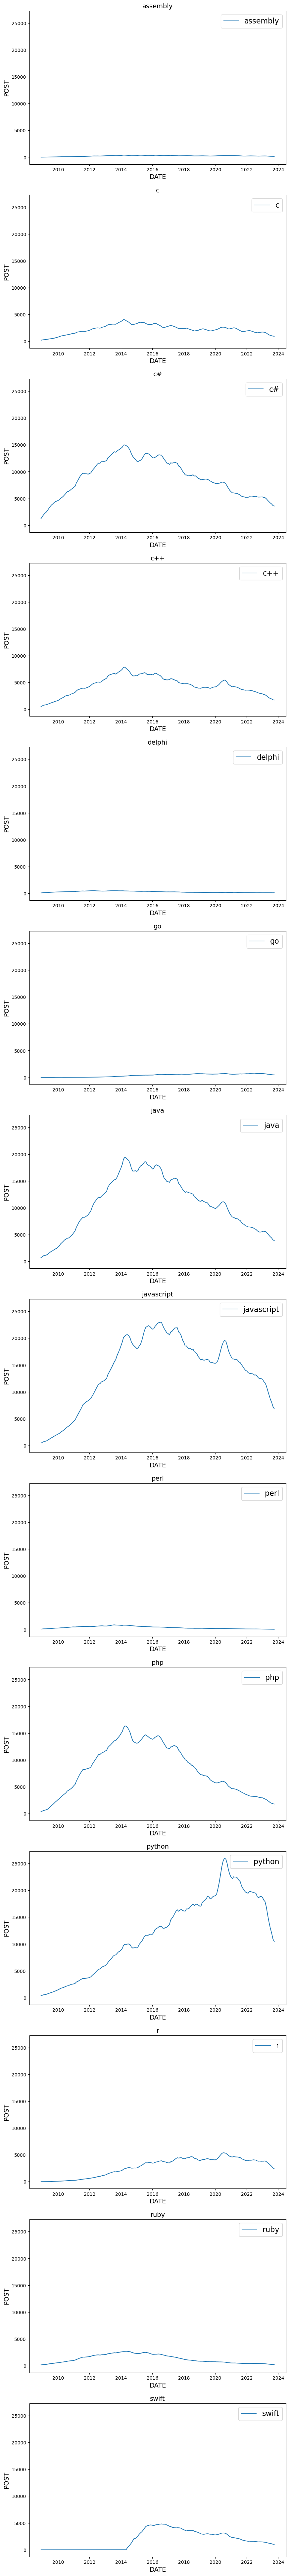

In [226]:


roll_df = reshaped_df.rolling(window=6).mean()
fig,plt_arr = plt.subplots(14,1,sharey=True,figsize=(10,100))

for i in range(roll_df.shape[1]):
    plt_arr[i].plot(roll_df.index,roll_df[roll_df.columns[i]],label=roll_df.columns[i])
    plt_arr[i].set_title(reshaped_df.columns[i],fontsize=14)
    plt_arr[i].set_xlabel("DATE",fontsize=14)
    plt_arr[i].set_ylabel("POST",fontsize=14)
    plt_arr[i].legend(fontsize=16) 
    
plt.savefig("Famous ALL tags subplots 2.pdf")
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [173]:
reshaped_df.info

<bound method DataFrame.info of TAG         assembly       c      c#     c++  delphi     go    java  \
DATE                                                                  
2008-07-01       0.0     0.0     3.0     0.0     0.0    0.0     0.0   
2008-08-01       8.0    83.0   505.0   164.0    14.0    0.0   222.0   
2008-09-01      28.0   320.0  1640.0   755.0   104.0    0.0  1129.0   
2008-10-01      16.0   303.0  1988.0   807.0   112.0    0.0  1149.0   
2008-11-01      16.0   258.0  1731.0   734.0   141.0    0.0   954.0   
...              ...     ...     ...     ...     ...    ...     ...   
2023-06-01     155.0   890.0  3801.0  1814.0   117.0  520.0  4283.0   
2023-07-01     161.0   917.0  3874.0  1852.0    99.0  523.0  4066.0   
2023-08-01     144.0   867.0  3654.0  1668.0   106.0  494.0  3841.0   
2023-09-01     157.0   876.0  3073.0  1498.0   105.0  428.0  3352.0   
2023-10-01     186.0  1013.0  3337.0  1868.0   171.0  447.0  3671.0   

TAG         javascript   perl     php   pyth